In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) # sets stocker ticker name as variable name for related df

In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,206.858805,203.282908,204.903505,205.264821,2.841459e+07,203.974804
std,32.977083,32.936190,32.968400,33.014051,1.110567e+07,33.655729
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,184.225006,181.029999,183.300003,182.659996,2.099195e+07,181.423927
50%,203.729996,200.479996,201.850006,202.589996,2.604360e+07,200.753860
75%,222.525002,217.829994,220.719994,220.760002,3.244115e+07,220.099205
max,282.649994,279.119995,282.230011,280.410004,9.131220e+07,280.410004


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-12-24 to 2019-12-20
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


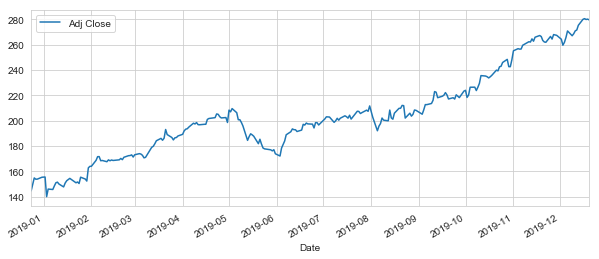

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

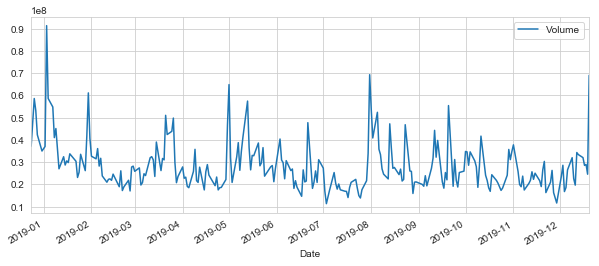

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean() # rolling_mean has been deprecated? Use this instead.

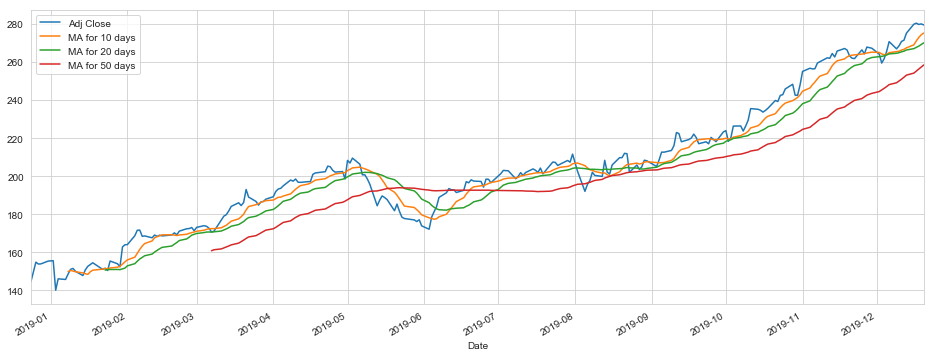

In [27]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(16,6))

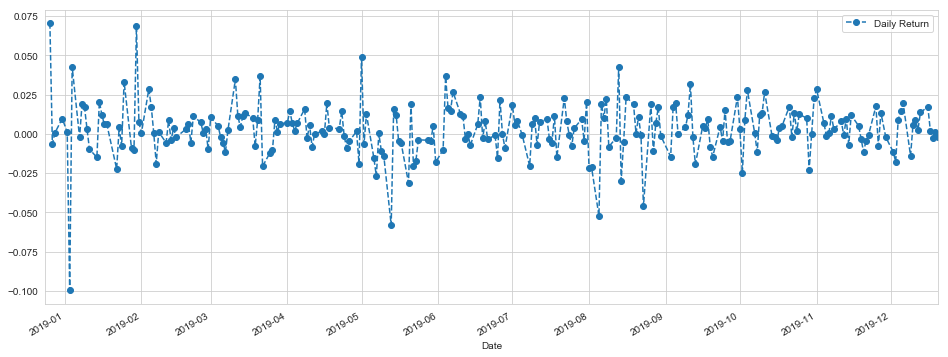

In [26]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(16,6),legend=True,linestyle='--',marker='o')

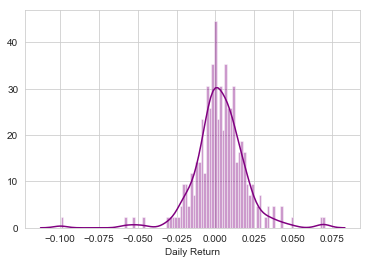

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

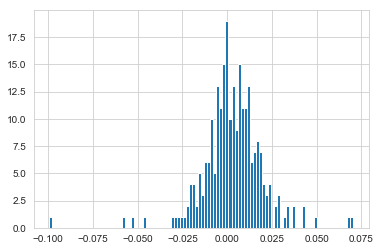

In [31]:
AAPL['Daily Return'].hist(bins=100)

In [32]:
df_closing = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [33]:
df_closing

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,144.656540,1343.959961,976.219971,92.758461
2018-12-26,154.843475,1470.900024,1039.459961,99.094772
2018-12-27,153.838562,1461.640015,1043.880005,99.705742
2018-12-28,153.917389,1478.020020,1037.079956,98.927246
2018-12-31,155.405045,1501.969971,1035.609985,100.090057
2019-01-02,155.582367,1539.130005,1045.849976,99.646614
2019-01-03,140.085220,1500.280029,1016.059998,95.980820
2019-01-04,146.065353,1575.390015,1070.709961,100.444817
2019-01-07,145.740265,1629.510010,1068.390015,100.572922


In [34]:
tech_rets = df_closing.pct_change()

In [35]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,NaN,NaN,NaN,NaN
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754


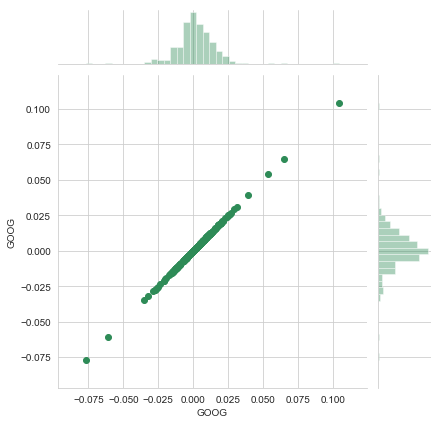

In [36]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

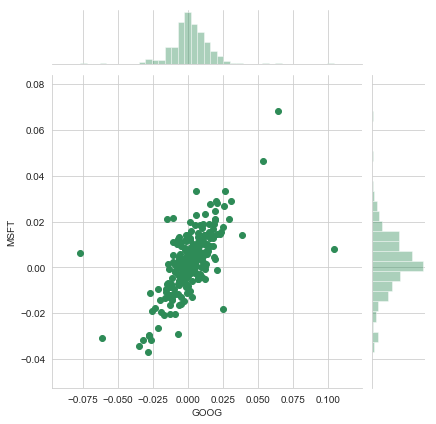

In [37]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

In [38]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-24,NaN,NaN,NaN,NaN
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754


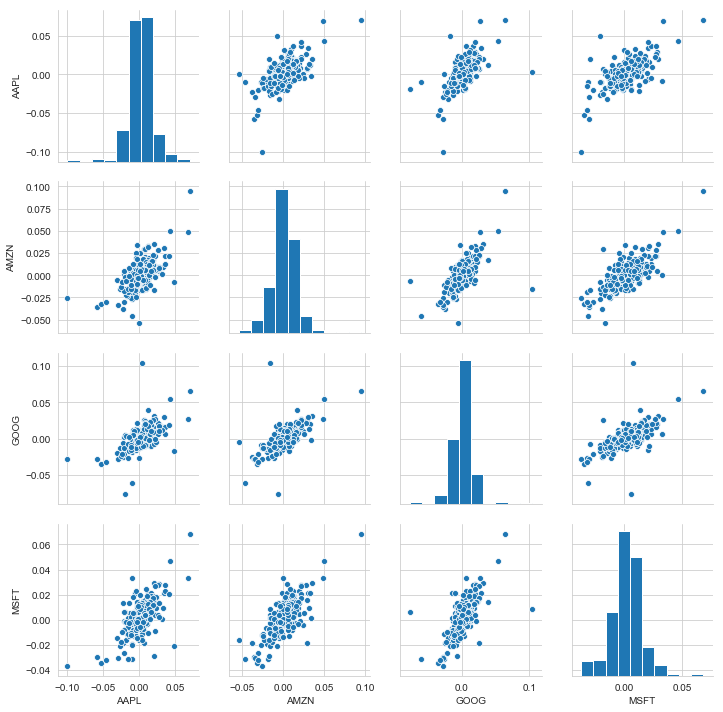

In [39]:
sns.pairplot(tech_rets.dropna())

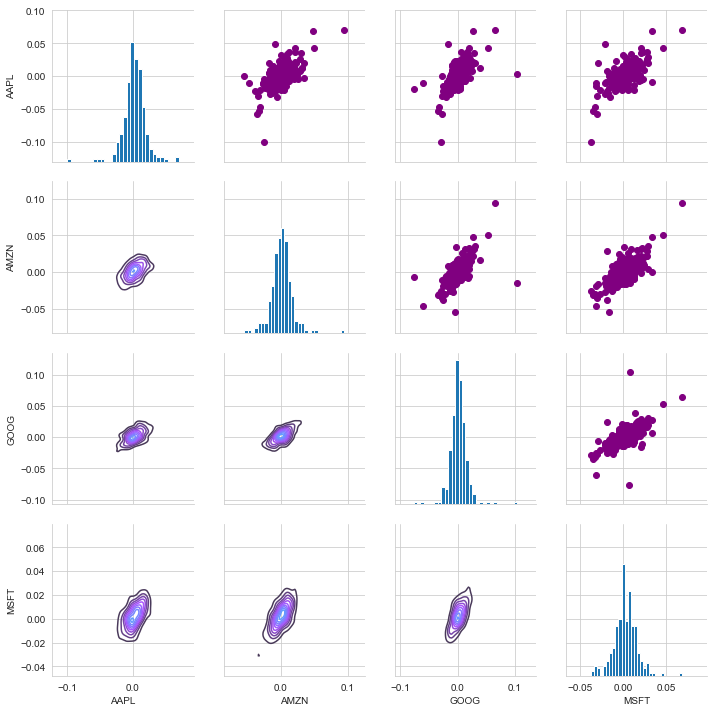

In [40]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

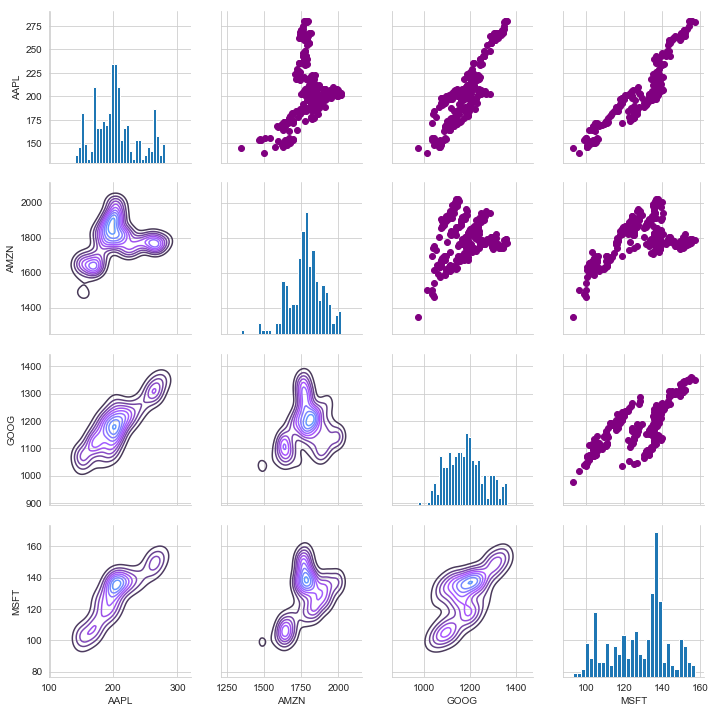

In [41]:
returns_fig = sns.PairGrid(df_closing)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

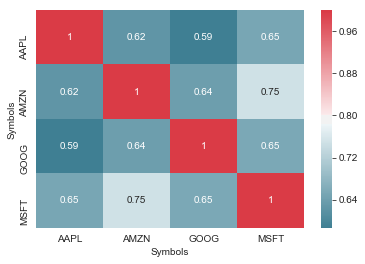

In [51]:
# corrplot is no longer part of seaborn, so instead we calcualte the correlation matrix using pandas .corr()
# then we use that matrix as our input in sns.heatmap()
corr = tech_rets.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,cmap=cmap,annot=True)

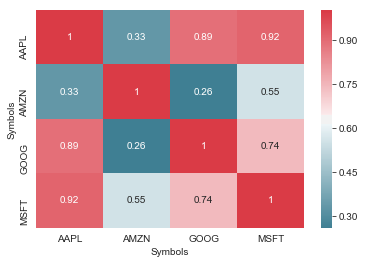

In [52]:
# same thing for the other dataframe

corr = df_closing.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,cmap=cmap,annot=True)

In [54]:
df_rets = tech_rets.dropna()

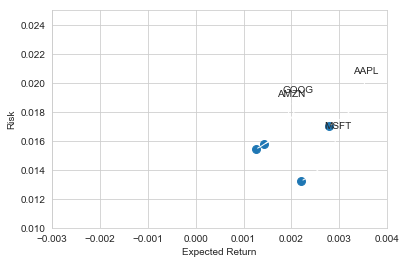

In [63]:
area = np.pi*20

plt.scatter(df_rets.mean(),df_rets.std(),s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(df_rets.columns,df_rets.mean(),df_rets.std()):
     plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

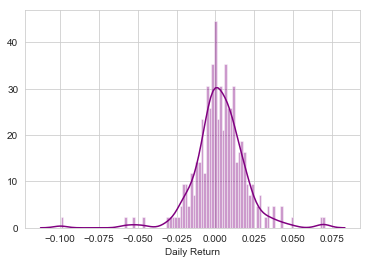

In [64]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [65]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-26,0.070422,0.094452,0.064780,0.068310
2018-12-27,-0.006490,-0.006295,0.004252,0.006166
2018-12-28,0.000512,0.011207,-0.006514,-0.007808
2018-12-31,0.009665,0.016204,-0.001417,0.011754
2019-01-02,0.001141,0.024741,0.009888,-0.004430


In [66]:
rets['AAPL'].quantile(0.05)

-0.020665865102220946

What this means is that we have 95% confidnece that at worst, our daily lsos will be 2-2.1%. This means that if we had 1 million dollars invested, that our VAR would be between 20,000-21,000 dollars

In [67]:
days = 365

dt = 1/days

mu = df_rets.mean()['GOOG']

sigma = df_rets.std()['GOOG']

In [69]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [70]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300,976.219971
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300,1039.459961
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800,1043.880005
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

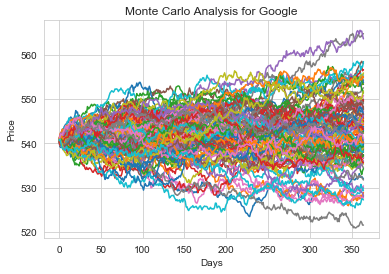

In [72]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [74]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

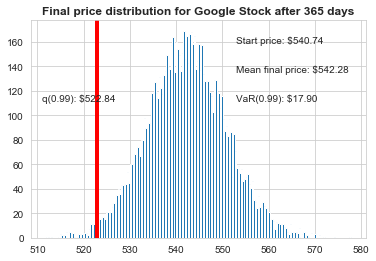

In [79]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')
